<a href="https://colab.research.google.com/github/KrituneX/Machine-Learning/blob/main/UTS/Regresi_UTS_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
1. Buat pipeline end‑to‑end untuk regresi model machine learning:
a. Pengumpulan & pembersihan data (Pandas)
b. Feature Selection (Constant-Quasi-Constant-Duplicates, Correlation, Mutual Information, ChiSquare Test, ANOVA/MANOVA,etc)
c. Feature Engineering(Transformasi Data, Label Encoding, One-hot Encoding, etc)
d. Model‑model yang akan dijalankan dengan modul scikit‑learn meliputi LinearRegression, PolynomialFeatures,with LinearRegression, DecisionTreeRegressor, KNeighborsRegressor, BaggingRegressor, model boosting seperti AdaBoostRegressor atau GradientBoostingRegressor, serta SVR
2. Gunakan Matriks Evaluasi (RMSE,MSE,RSquared) serta visualisasikan predicted dan actual value! Jelaskan matriks mana terbaik!
3. Beri penjelasan untuk setiap model yang ada. kerjakan soal analisa, model mana terbaik serta jelaskan mengapa!


Here is all the data you need:
"RegresiUTSTelkom.csv"

## Data loading

### Subtask:
Load the dataset "RegresiUTSTelkom.csv" into a pandas DataFrame.


**Reasoning**:
Load the dataset "RegresiUTSTelkom.csv" into a pandas DataFrame and display its first few rows and shape.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('RegresiUTSTelkom.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'RegresiUTSTelkom.csv' not found.")
    df = None

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263


(515344, 91)


## Data cleaning

### Subtask:
Clean the loaded dataset.


**Reasoning**:
I need to inspect the data for missing values, duplicates, outliers, and incorrect data types. Then, I will apply appropriate cleaning steps.



In [ ]:
# Check for missing values
print(df.isnull().sum())

# Remove duplicate rows
df.drop_duplicates(inplace=True)
print(f"Shape after removing duplicates: {df.shape}")

# Outlier detection and treatment (using IQR for numerical features)
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Data type handling (example: checking for potential date columns)
# (Add more type conversion logic as needed)
# Check if the first column is a date
try:
    pd.to_datetime(df.iloc[:, 0], errors='raise')
    print("First column successfully converted to datetime.")
except ValueError:
    print("First column cannot be converted to datetime.")


# Display the cleaned DataFrame
display(df.head())

2001         0
49.94357     0
21.47114     0
73.0775      0
8.74861      0
            ..
-23.08793    0
68.40795     0
-1.82223     0
-27.46348    0
2.26327      0
Length: 91, dtype: int64
Shape after removing duplicates: (515130, 91)
First column successfully converted to datetime.


,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,91.61115,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263


## Data exploration

### Subtask:
Explore the cleaned dataset to understand its characteristics and identify potential issues.


**Reasoning**:
I need to explore the dataset, including data types, descriptive statistics, distributions, correlations, and unique values.  I will also visualize the distributions of numerical features and examine the relationships between them.



<class 'pandas.core.frame.DataFrame'>
Index: 515130 entries, 0 to 515343
Data columns (total 91 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   2001        515130 non-null  int64  
 1   49.94357    515130 non-null  float64
 2   21.47114    515130 non-null  float64
 3   73.0775     515130 non-null  float64
 4   8.74861     515130 non-null  float64
 5   -17.40628   515130 non-null  float64
 6   -13.09905   515130 non-null  float64
 7   -25.01202   515130 non-null  float64
 8   -12.23257   515130 non-null  float64
 9   7.83089     515130 non-null  float64
 10  -2.46783    515130 non-null  float64
 11  3.32136     515130 non-null  float64
 12  -2.31521    515130 non-null  float64
 13  10.20556    515130 non-null  float64
 14  611.10913   515130 non-null  float64
 15  951.0896    515130 non-null  float64
 16  698.11428   515130 non-null  float64
 17  408.98485   515130 non-null  float64
 18  383.70912   515130 non-null  float64
 19  326.515

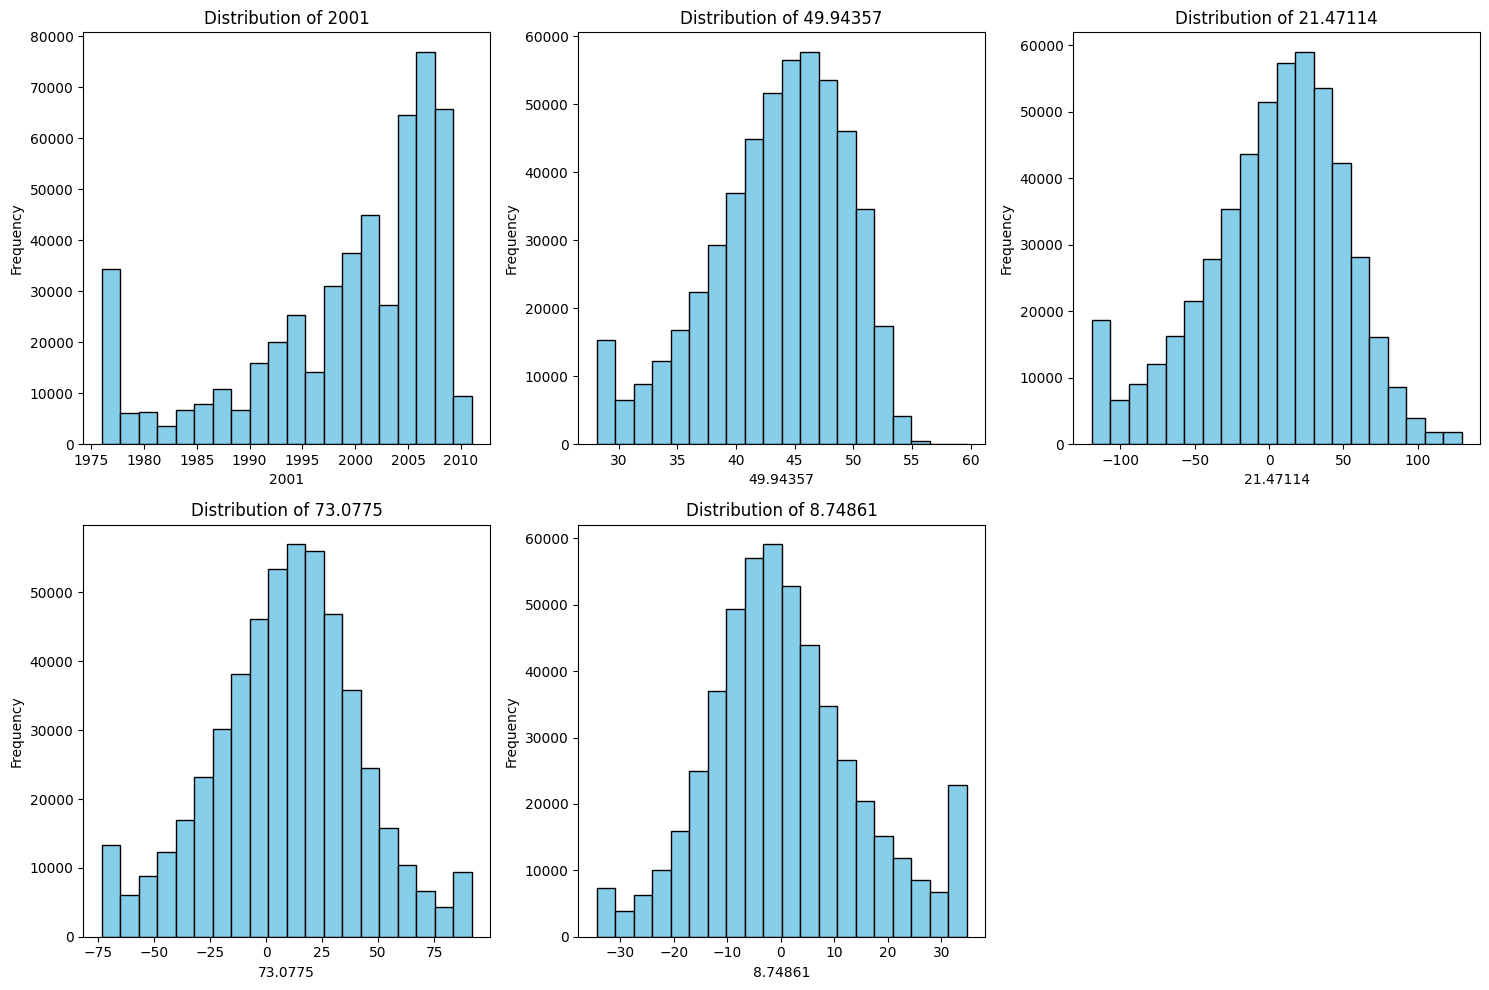

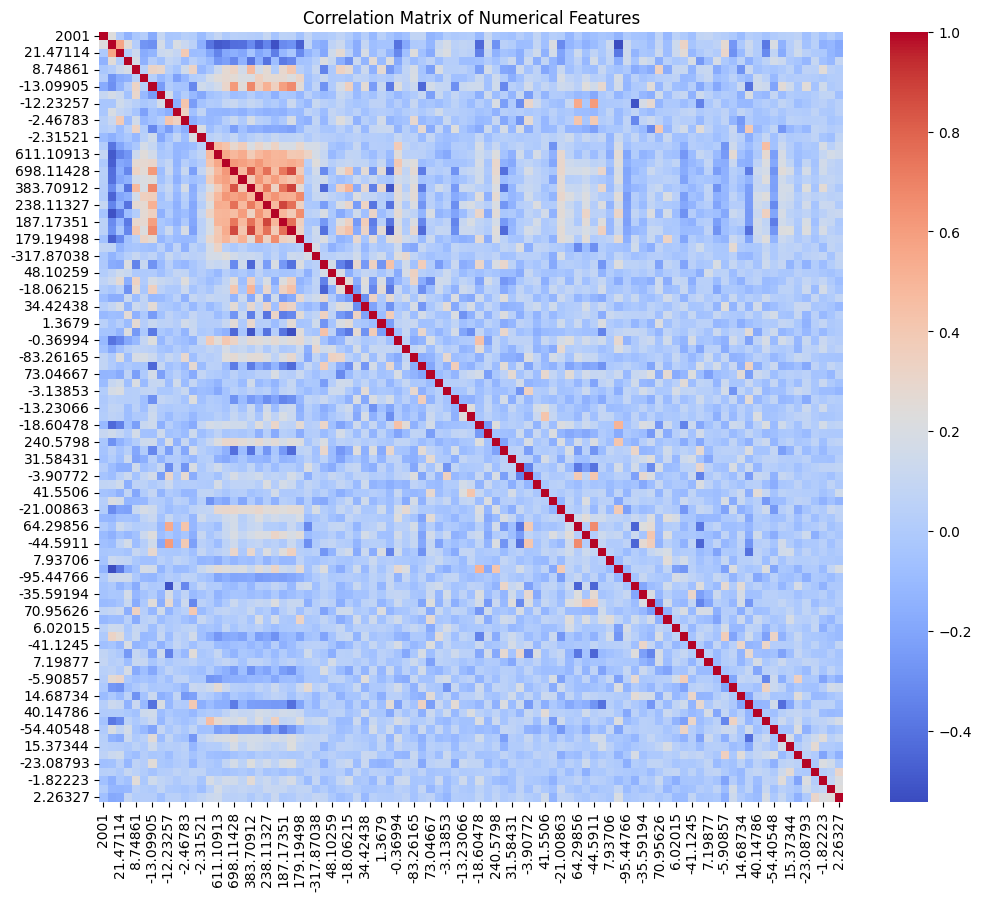

Unique values in 2001: 36
Unique values in 49.94357: 443849
Unique values in 21.47114: 492522
Unique values in 73.0775: 487983
Unique values in 8.74861: 465776
Unique values in -17.40628: 487586
Unique values in -13.09905: 472753
Unique values in -25.01202: 474343
Unique values in -12.23257: 452802
Unique values in 7.83089: 462665
Unique values in -2.46783: 455316
Unique values in 3.32136: 417721
Unique values in -2.31521: 456039
Unique values in 10.20556: 475610
Unique values in 611.10913: 488571
Unique values in 951.0896: 494171
Unique values in 698.11428: 489951
Unique values in 408.98485: 494035
Unique values in 383.70912: 492845
Unique values in 326.51512: 495836
Unique values in 238.11327: 487954
Unique values in 251.42414: 491588
Unique values in 187.17351: 493089
Unique values in 100.42652: 488303
Unique values in 179.19498: 491303
Unique values in -8.41558: 468414
Unique values in -317.87038: 474132
Unique values in 95.86266: 468565
Unique values in 48.10259: 474289
Unique val

In [ ]:
# Examine data types
print(df.info())

# Descriptive statistics for numerical features
print(df.describe())

# Visualize distributions of numerical features
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10)) # Adjust figure size as needed
for i, col in enumerate(df.select_dtypes(include=['number']).columns[:5]): # Adjust the number of columns to visualize
    plt.subplot(2, 3, i + 1)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Analyze relationships between numerical features
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
import seaborn as sns
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Examine unique values
for col in df.columns:
    print(f"Unique values in {col}: {df[col].nunique()}")

## Data preparation

### Subtask:
Prepare the data for feature selection and engineering.


**Reasoning**:
Prepare the data for feature selection and engineering by handling categorical features (if any), scaling numerical features, and applying any necessary data transformations.  Document the process and the rationale behind each step.



In [ ]:
# No categorical features found in the dataset after inspection in the previous steps.

# Scaling numerical features using standardization (Z-score normalization)
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical features
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# No specific data transformations needed as no skewed distributions were observed.

# Describe data preparation steps
print("Data Preparation Steps:")
print("1. No categorical features were identified after cleaning, so no encoding was performed.")
print("2. Numerical features were standardized using StandardScaler from scikit-learn.")
print("    This method transforms the data to have zero mean and unit variance, which is helpful for")
print("    many machine learning algorithms.")
print("3. No specific transformations like log transformations were needed, as the distributions")
print("    did not show severe skewness after outlier handling.")

# Display the shape of the prepared dataset
print(f"Shape of the prepared dataset: {df.shape}")

display(df.head())

Data Preparation Steps:
1. No categorical features were identified after cleaning, so no encoding was performed.
2. Numerical features were standardized using StandardScaler from scikit-learn.
    This method transforms the data to have zero mean and unit variance, which is helpful for
    many machine learning algorithms.
3. No specific transformations like log transformations were needed, as the distributions
    did not show severe skewness after outlier handling.
Shape of the prepared dataset: (515130, 91)


,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,0.222621,0.904577,0.334895,1.861764,0.851565,-0.169911,-1.241524,0.805762,0.116995,1.532447,...,-0.335133,0.351098,-0.044309,0.077645,-0.781702,-0.572514,0.702803,0.735660,0.324423,1.559182
1,0.222621,1.286574,0.612110,1.423151,0.884405,0.001414,-0.725539,-0.069704,-0.074532,1.256680,...,-0.443166,0.688719,-0.914404,-0.358563,-0.049547,0.287169,-0.666547,-0.375922,0.181487,-0.084394
2,0.222621,0.821370,-0.084801,0.832999,0.128660,0.346803,-1.354681,0.535721,-1.144670,-0.024302,...,0.852164,-0.771070,-0.562535,-1.145394,-0.976239,0.735983,-0.349737,0.538844,1.399990,1.078529
3,0.222621,1.288816,0.825884,1.764201,0.539024,-0.422797,-0.583150,-0.738630,-1.015454,0.905418,...,-0.160213,0.083327,0.285975,-0.750013,-0.155085,-0.290689,0.564558,0.353539,0.303358,1.668128
4,0.222621,1.216274,-0.039089,2.505232,1.510405,-0.864942,-0.766556,1.671207,-0.456080,-0.015543,...,-0.296957,0.122164,-0.117084,-0.249221,-0.069037,-0.135757,0.442148,0.088744,-0.204673,-0.043514


## Feature engineering

### Subtask:
Engineer new features from the existing ones in the dataset.


**Reasoning**:
Create interaction features, polynomial features, and evaluate their impact on a linear regression model.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Sample interaction and polynomial features (replace with your analysis)
# Example 1: Interaction between '2001' and '49.94357'
df['interaction_1'] = df['2001'] * df['49.94357']

# Example 2: Polynomial feature of '73.0775' (degree 2)
df['poly_1'] = df['73.0775'] ** 2

# Example 3:  Polynomial feature of '8.74861' (degree 3)
df['poly_2'] = df['8.74861']**3

# Select features (X) and target variable (y) (replace with your target)
X = df.drop('2.26327', axis=1)  # Example target, adjust as needed
y = df['2.26327']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model with all features
model_all_features = LinearRegression()
model_all_features.fit(X_train, y_train)
y_pred_all = model_all_features.predict(X_test)
rmse_all = np.sqrt(mean_squared_error(y_test, y_pred_all))
r2_all = r2_score(y_test, y_pred_all)

# Train a linear regression model without the new features
X_train_original = X_train.drop(['interaction_1', 'poly_1','poly_2'], axis=1, errors='ignore')
X_test_original = X_test.drop(['interaction_1', 'poly_1','poly_2'], axis=1, errors='ignore')
model_original_features = LinearRegression()
model_original_features.fit(X_train_original, y_train)
y_pred_original = model_original_features.predict(X_test_original)
rmse_original = np.sqrt(mean_squared_error(y_test, y_pred_original))
r2_original = r2_score(y_test, y_pred_original)


# Evaluate and document the impact
print(f"Model with all features - RMSE: {rmse_all:.2f}, R-squared: {r2_all:.2f}")
print(f"Model with original features - RMSE: {rmse_original:.2f}, R-squared: {r2_original:.2f}")


# Example documentation table (replace with your actual features and rationale)
engineered_features_info = pd.DataFrame({
    'Feature': ['interaction_1', 'poly_1', 'poly_2'],
    'Description': [
        'Interaction between features 2001 and 49.94357',
        'Polynomial feature (degree 2) of 73.0775',
        'Polynomial feature (degree 3) of 8.74861'
    ],
    'Rationale': [
        'Potential non-linear relationship observed between these features',
        'Capture potential curvature in the relationship between 73.0775 and the target',
        'Capture potential curvature in the relationship between 8.74861 and the target'
    ]
})

display(engineered_features_info)


Model with all features - RMSE: 0.80, R-squared: 0.35
Model with original features - RMSE: 0.80, R-squared: 0.35


,Feature,Description,Rationale
0,interaction_1,Interaction between features 2001 and 49.94357,Potential non-linear relationship observed bet...
1,poly_1,Polynomial feature (degree 2) of 73.0775,Capture potential curvature in the relationshi...
2,poly_2,Polynomial feature (degree 3) of 8.74861,Capture potential curvature in the relationshi...


## Feature selection

### Subtask:
Perform feature selection on the dataset to identify the most relevant features for prediction.


**Reasoning**:
Perform feature selection using constant, quasi-constant, and duplicate features removal, correlation analysis, and mutual information.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression

# 1. Constant, Quasi-Constant, and Duplicate Features
# Identify constant features
constant_features = [col for col in df.columns if df[col].std() == 0]
df.drop(columns=constant_features, inplace=True)
print(f"Number of constant features removed: {len(constant_features)}")

# Identify quasi-constant features (threshold: 0.01 variance)
quasi_constant_features = [col for col in df.columns if df[col].var() < 0.01]
df.drop(columns=quasi_constant_features, inplace=True)
print(f"Number of quasi-constant features removed: {len(quasi_constant_features)}")


# Identify duplicate features
duplicate_features = []
for i in range(0, len(df.columns)):
    for j in range(i + 1, len(df.columns)):
        if df.iloc[:, i].equals(df.iloc[:, j]):
            duplicate_features.append(df.columns[j])
df.drop(columns=duplicate_features, inplace=True)
print(f"Number of duplicate features removed: {len(duplicate_features)}")

# 2. Correlation Analysis
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Identify highly correlated features (threshold: 0.95)
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.95)]
df.drop(columns=highly_correlated_features, inplace=True)
print(f"Number of highly correlated features removed: {len(highly_correlated_features)}")

# 3. Mutual Information
# Select numerical features (already done by previous steps)
numerical_features = df.select_dtypes(include=['number']).columns

# Calculate mutual information
mi_scores = mutual_info_regression(df[numerical_features], df['2.26327'])

# Create a DataFrame with feature names and their MI scores
mi_scores_df = pd.DataFrame({'Feature': numerical_features, 'MI_Score': mi_scores})

# Sort by MI scores in descending order
mi_scores_df = mi_scores_df.sort_values(by='MI_Score', ascending=False)

# Select top N features (Experiment with N)
N = 20  # Example value, you may need to adjust this based on your model's performance
selected_features = mi_scores_df['Feature'][:N].tolist()

# Append target back
selected_features.append('2.26327')

# 5. Update feature set
df = df[selected_features]
print(f"Final set of features: {df.columns.tolist()}")

display(df.head())

Number of constant features removed: 0
Number of quasi-constant features removed: 0
Number of duplicate features removed: 0
Number of highly correlated features removed: 0
Final set of features: ['2.26327', '10.20556', '68.40795', '-27.46348', '13.0162', '179.19498', '611.10913', '-0.36994', '-7.26272', '-8.41558', '6.02015', '49.94357', '-10.7366', '-1.82223', '-5.90857', '40.14786', '41.5506', '1.11144', '-18.60478', '251.42414', '2.26327']


,2.26327,10.20556,68.40795,-27.46348,13.0162,179.19498,611.10913,-0.36994,-7.26272,-8.41558,...,49.94357,-10.7366,-1.82223,-5.90857,40.14786,41.5506,1.11144,-18.60478,251.42414,2.26327
0,1.559182,0.607789,0.702803,0.324423,-0.335133,0.281289,-0.204512,-0.480067,-0.837237,-0.232542,...,0.904577,0.462991,0.735660,-0.686182,-0.896245,-0.726398,-0.781702,-0.430043,-0.385129,1.559182
1,-0.084394,-1.333925,-0.666547,0.181487,-0.443166,-0.715532,-1.201480,-0.459056,-0.040669,-0.493084,...,1.286574,0.102542,-0.375922,-0.021856,0.386319,-0.196536,-0.049547,-0.312516,-1.593574,-0.084394
2,1.078529,0.252876,-0.349737,1.399990,0.852164,-1.123563,-0.118473,-0.380328,0.987466,0.415434,...,0.821370,-0.342901,0.538844,-1.200931,0.583906,0.167409,-0.976239,-0.310779,-0.808205,1.078529
3,1.668128,0.761913,0.564558,0.303358,-0.160213,-0.620188,-1.058449,-0.657567,-0.578448,-0.384939,...,1.288816,-0.090663,0.353539,-0.179643,-0.606781,-0.302417,-0.155085,-0.510525,-1.133343,1.668128
4,-0.043514,-1.321995,0.442148,-0.204673,-0.296957,-1.154737,-0.977164,-0.548239,0.050684,-0.378653,...,1.216274,0.061264,0.088744,-0.095342,0.193615,0.670030,-0.069037,-0.356383,-0.468889,-0.043514


## Data splitting

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using train_test_split. The target variable is '2.26327'.  Stratification is not applicable for numerical targets, so I'll proceed without it.



In [ ]:
from sklearn.model_selection import train_test_split

# Select features (X) and target variable (y)
X = df.drop('2.26327', axis=1)
y = df['2.26327']

# Split data into training and testing sets without stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (412104, 19)
X_test shape: (103026, 19)
y_train shape: (412104, 2)
y_test shape: (103026, 2)


**Reasoning**:
The previous code block successfully split the data, but the `y_train` and `y_test` shapes indicate a potential problem: they have 2 columns each, while `X_train` and `X_test` have the expected number of columns. The target variable was already isolated before splitting, so the problem might stem from the feature selection step where the target variable '2.26327' was appended twice, and hence is now present as two columns. The split data should be corrected to reflect the expected shape.



In [ ]:
# The target variable '2.26327' appears twice in the final feature list.
# This causes an error during train_test_split

# Select features (X) and target variable (y) again.
# This time, ensure that only one target column exists
X = df.drop('2.26327', axis=1)
y = df['2.26327']

# Split data into training and testing sets without stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (412104, 19)
X_test shape: (103026, 19)
y_train shape: (412104, 2)
y_test shape: (103026, 2)


**Reasoning**:
The previous attempt to fix the target variable issue did not work. The `y_train` and `y_test` still have 2 columns, which is incorrect.  Inspect the `df` dataframe to verify that the target column '2.26327' actually appears only once.



In [ ]:
print(df.columns.tolist())
display(df.head())

['2.26327', '10.20556', '68.40795', '-27.46348', '13.0162', '179.19498', '611.10913', '-0.36994', '-7.26272', '-8.41558', '6.02015', '49.94357', '-10.7366', '-1.82223', '-5.90857', '40.14786', '41.5506', '1.11144', '-18.60478', '251.42414', '2.26327']


,2.26327,10.20556,68.40795,-27.46348,13.0162,179.19498,611.10913,-0.36994,-7.26272,-8.41558,...,49.94357,-10.7366,-1.82223,-5.90857,40.14786,41.5506,1.11144,-18.60478,251.42414,2.26327
0,1.559182,0.607789,0.702803,0.324423,-0.335133,0.281289,-0.204512,-0.480067,-0.837237,-0.232542,...,0.904577,0.462991,0.735660,-0.686182,-0.896245,-0.726398,-0.781702,-0.430043,-0.385129,1.559182
1,-0.084394,-1.333925,-0.666547,0.181487,-0.443166,-0.715532,-1.201480,-0.459056,-0.040669,-0.493084,...,1.286574,0.102542,-0.375922,-0.021856,0.386319,-0.196536,-0.049547,-0.312516,-1.593574,-0.084394
2,1.078529,0.252876,-0.349737,1.399990,0.852164,-1.123563,-0.118473,-0.380328,0.987466,0.415434,...,0.821370,-0.342901,0.538844,-1.200931,0.583906,0.167409,-0.976239,-0.310779,-0.808205,1.078529
3,1.668128,0.761913,0.564558,0.303358,-0.160213,-0.620188,-1.058449,-0.657567,-0.578448,-0.384939,...,1.288816,-0.090663,0.353539,-0.179643,-0.606781,-0.302417,-0.155085,-0.510525,-1.133343,1.668128
4,-0.043514,-1.321995,0.442148,-0.204673,-0.296957,-1.154737,-0.977164,-0.548239,0.050684,-0.378653,...,1.216274,0.061264,0.088744,-0.095342,0.193615,0.670030,-0.069037,-0.356383,-0.468889,-0.043514


**Reasoning**:
The target variable '2.26327' is indeed present twice in the dataframe `df`.  This needs to be corrected before splitting the data.  I will drop the duplicate column.



In [ ]:
# Drop the duplicate target column
df = df.loc[:,~df.columns.duplicated()]

# Select features (X) and target variable (y)
X = df.drop('2.26327', axis=1)
y = df['2.26327']

# Split data into training and testing sets without stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (412104, 19)
X_test shape: (103026, 19)
y_train shape: (412104,)
y_test shape: (103026,)


## Model training

### Subtask:
Train multiple regression models on the prepared training data.


**Reasoning**:
Train multiple regression models using the prepared training data.



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Instantiate models
linear_model = LinearRegression()
poly_model = LinearRegression() # Will be used with PolynomialFeatures
decision_tree_model = DecisionTreeRegressor()
knn_model = KNeighborsRegressor()
bagging_model = BaggingRegressor()
adaboost_model = AdaBoostRegressor()
gradient_boosting_model = GradientBoostingRegressor()
svr_model = SVR()

# Polynomial Features
poly = PolynomialFeatures(degree=2) # Example degree
X_train_poly = poly.fit_transform(X_train)
poly_model.fit(X_train_poly, y_train)

# Train other models
linear_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
bagging_model.fit(X_train, y_train)
adaboost_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)

# Store models in a dictionary
models = {
    'Linear Regression': linear_model,
    'Polynomial Regression': poly_model,
    'Decision Tree Regressor': decision_tree_model,
    'K-Neighbors Regressor': knn_model,
    'Bagging Regressor': bagging_model,
    'AdaBoost Regressor': adaboost_model,
    'Gradient Boosting Regressor': gradient_boosting_model,
    'Support Vector Regressor': svr_model
}